#### The dataset is downloaded from Kaggle.
-Its an combination of the world news and stock price shifts. Data ranges from 2008 to 2016 and the data from 2000 to 2008 was  scrapped from Yahoo finance. labels are based on the Dow Jones Industrial Average(DJIA) stock Index.                         
-'Label' :: class 1 : indicates stock price increased , class 0 : stock price stayed the same or decreased.  

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the dataset

In [2]:
df = pd.read_csv('stock_sentiment_data.csv', encoding='ISO-8859-1')
df.head(2)     # It contains Top headlines for a particular company

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


In [3]:
df.shape

(4101, 27)

In [4]:
# Now 1st we divide the data into train and test
train = df[df['Date'] < '2015-01-01']
test = df[df['Date'] > '2014-12-31']

In [5]:
test.shape

(378, 27)

## Applying NLP - to train data

In [6]:
data = train.iloc[:,2:27]    # Here comes the train data from 'Top1' to 'Top25'

In [7]:
# Renaming columns Top1, Top2 , ....  to 1,2, ....25  for ease of access
list1 = [i for i in range(25)]
news_index = [str(i) for i in list1]
data.columns = news_index
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title


In [8]:
data.replace('[^a-zA-Z]', ' ', regex=True, inplace=True)     # remove all stopwords using regex=True

# Now converting headlines to lower case
for index in news_index:
    data[index] = data[index].str.lower()        
    

# Now joining every row of data news 
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))  # it iterates every row from 0 to 25 column and append it.

In [9]:
headlines[0] 

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

#### Using "CountVectorizer " to create - Bag of Words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))

train_dataset = cv.fit_transform(headlines)

## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(n_estimators=200, criterion='entropy')
classifier1.fit(train_dataset, train['Label'])      # train['Label'] - dependent feature of train set like: y_train

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Prediction for the test dataset

In [12]:
# 1st we transform the data, Here we iterate through every row and append the data.

test_transform = []                          
for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))  # iterating from 2 to 27 column 
    
test_dataset = cv.transform(test_transform)     # transform the test data using CountVectorizer - cv

In [13]:
prediction = classifier1.predict(test_dataset)    # Now predict the test data

## Check Accuracy

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cf = confusion_matrix(test['Label'], prediction)    # test['Label'] like : y_test during - train_test_split

acc= accuracy_score(test['Label'], prediction)

report = classification_report(test['Label'], prediction)

print('confusion_matrix : \n', cf)
print('\n\nclassification report : \n', report)

confusion_matrix : 
 [[ 18 168]
 [ 20 172]]


classification report : 
               precision    recall  f1-score   support

           0       0.47      0.10      0.16       186
           1       0.51      0.90      0.65       192

   micro avg       0.50      0.50      0.50       378
   macro avg       0.49      0.50      0.40       378
weighted avg       0.49      0.50      0.41       378



In [16]:
print(f'Accuracy score is : {acc:0.2%}')

Accuracy score is : 50.26%


## --------------------------

## Creating word cloud of - Bag of words

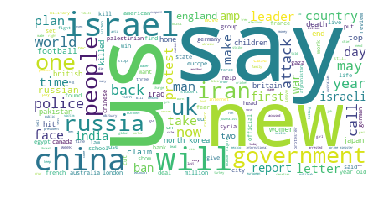

In [18]:
from wordcloud import WordCloud                                 
import matplotlib.pyplot as plt

cloud = WordCloud(background_color='white').generate(str(headlines))          # Here 'headlines' is in list converted into str
 
plt.imshow(cloud)
plt.axis('off')
plt.show()